####  Load the libraries that will be used

In [47]:
# import libraries

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

##### Load the ALS data file 

In [48]:
# load the file

als_df = pd.read_csv('als_data.csv')

##### Display the first few rows to understand what is in the data

In [49]:
# display the first few rows

als_df.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


##### Print the columns so I can see if they are all needed and what they consist of

In [50]:
# get column names

columns = als_df.columns.tolist()

print(columns)

['ID', 'Age_mean', 'Albumin_max', 'Albumin_median', 'Albumin_min', 'Albumin_range', 'ALSFRS_slope', 'ALSFRS_Total_max', 'ALSFRS_Total_median', 'ALSFRS_Total_min', 'ALSFRS_Total_range', 'ALT.SGPT._max', 'ALT.SGPT._median', 'ALT.SGPT._min', 'ALT.SGPT._range', 'AST.SGOT._max', 'AST.SGOT._median', 'AST.SGOT._min', 'AST.SGOT._range', 'Bicarbonate_max', 'Bicarbonate_median', 'Bicarbonate_min', 'Bicarbonate_range', 'Blood.Urea.Nitrogen..BUN._max', 'Blood.Urea.Nitrogen..BUN._median', 'Blood.Urea.Nitrogen..BUN._min', 'Blood.Urea.Nitrogen..BUN._range', 'bp_diastolic_max', 'bp_diastolic_median', 'bp_diastolic_min', 'bp_diastolic_range', 'bp_systolic_max', 'bp_systolic_median', 'bp_systolic_min', 'bp_systolic_range', 'Calcium_max', 'Calcium_median', 'Calcium_min', 'Calcium_range', 'Chloride_max', 'Chloride_median', 'Chloride_min', 'Chloride_range', 'Creatinine_max', 'Creatinine_median', 'Creatinine_min', 'Creatinine_range', 'Gender_mean', 'Glucose_max', 'Glucose_median', 'Glucose_min', 'Glucose_ra

##### Remove the columns that are not relavant to the ALS condition that we are testing for

In [51]:
# remove columns not relevant to pat ALS

als_rev_data = als_df.drop(columns=['ID','SubjectID'])

#####  Check the dataset for missing or NaN values to understand if they need to be corrected

In [52]:
# check for missing or NaN values in the dataset

missing_values = als_rev_data.isna().sum()

# display columns that have missing values along with the count of missing values

missing_values = missing_values[missing_values > 0]
missing_values

Series([], dtype: int64)

#####  Summarize the ALS data set and get descriptive stats about the data

In [53]:
# summary als

als_rev_data.describe()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,...,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,54.550157,47.011134,43.952542,40.766347,0.013779,-0.728274,31.692308,27.104926,19.877193,0.026035,...,140.145254,136.755061,0.015000,6.203779,4.893387,2.955915,0.007136,6.820450,5.710639,5.183221
std,11.396546,3.233980,2.654804,3.193087,0.009567,0.622329,5.314228,6.633643,8.583509,0.016156,...,1.789886,2.715247,0.009283,1.747660,2.146076,2.358095,0.004503,0.932141,0.625039,0.437222
min,18.000000,37.000000,34.500000,24.000000,0.000000,-4.345238,11.000000,2.500000,0.000000,0.000000,...,128.000000,112.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000
25%,47.000000,45.000000,42.000000,39.000000,0.009042,-1.086310,29.000000,23.000000,14.000000,0.014035,...,139.000000,135.000000,0.010582,5.000000,3.000000,1.000000,0.003643,6.000000,5.000000,5.000000
50%,55.000000,47.000000,44.000000,41.000000,0.012111,-0.620748,33.000000,28.000000,20.000000,0.023297,...,140.000000,137.000000,0.013123,7.000000,5.000000,3.000000,0.006920,7.000000,6.000000,5.000000
75%,63.000000,49.000000,46.000000,43.000000,0.015873,-0.283832,36.000000,32.000000,27.000000,0.034799,...,141.000000,138.000000,0.017278,8.000000,6.500000,5.000000,0.009639,7.000000,6.000000,5.000000
max,81.000000,70.300000,51.100000,49.000000,0.243902,1.207011,40.000000,40.000000,40.000000,0.117647,...,146.500000,145.000000,0.142857,8.000000,8.000000,8.000000,0.042017,9.000000,9.000000,8.000000


#####  Apply the standard scaler to the data to scale to unit variance & convert to a Dataframe

In [54]:
# apply a standard scaler to the data

scaler = StandardScaler()
als_scaled_data = scaler.fit_transform(als_rev_data)

# convert scaled data to a df for ease of use

als_scaled_df = pd.DataFrame(als_scaled_data, columns=als_rev_data.columns)

# display the first few rows

als_scaled_df.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,0.917137,3.089417,-1.300781,-0.866550,5.480929,-0.381450,-0.318520,0.134960,0.247368,-0.301588,...,2.992342,2.300470,0.260968,1.028018,0.981832,1.715365,-0.997420,-0.880376,0.463054,1.868532
1,-0.574879,-0.622016,-1.112401,-0.553303,-0.347725,-0.310907,0.998995,0.888863,0.130839,0.166537,...,-1.198812,-0.278144,-0.489913,1.028018,0.981832,0.867032,-0.388669,0.192665,-1.137208,-0.419151
2,-1.452535,0.924415,1.148162,1.326179,-0.507103,-0.299769,-1.447819,-1.975969,-1.150976,-0.064100,...,1.595291,1.195350,-0.654169,-0.688950,-2.280669,-1.253800,0.398249,-0.880376,-1.137208,-0.419151
3,0.741606,-0.003443,0.017880,0.073191,-0.174361,0.208801,-0.318520,0.285741,0.480425,-0.685524,...,-0.639992,0.458603,-0.272701,-0.688950,0.049689,0.018699,-0.477181,0.192665,0.463054,-0.419151
4,0.741606,-0.003443,0.583021,0.386438,-0.573670,0.456831,0.057913,0.059570,0.014311,-0.350529,...,-0.081171,0.458603,-0.722774,-0.116627,-0.416383,-0.829634,0.300598,-0.880376,-1.137208,-0.419151


##### Use the KMeans cluster to test diff numbers of clusters on the scaled data to find the best number of clusters

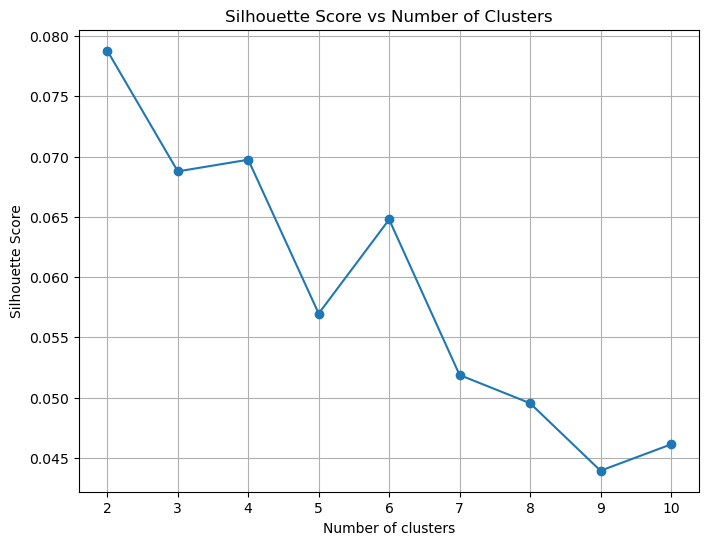

In [55]:
# range for number of clusters to try

cluster_range = range(2,11)
# empy list for the scores

silhouette_scores = []

# interate over number in the cluster range

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(als_scaled_df)
    silhouette_avg = silhouette_score(als_scaled_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# plot the silhouette scores

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

##### Fit a KMeans cluster model with 2 clusters to the ALS data, transforming with PCA and visualize the clusters

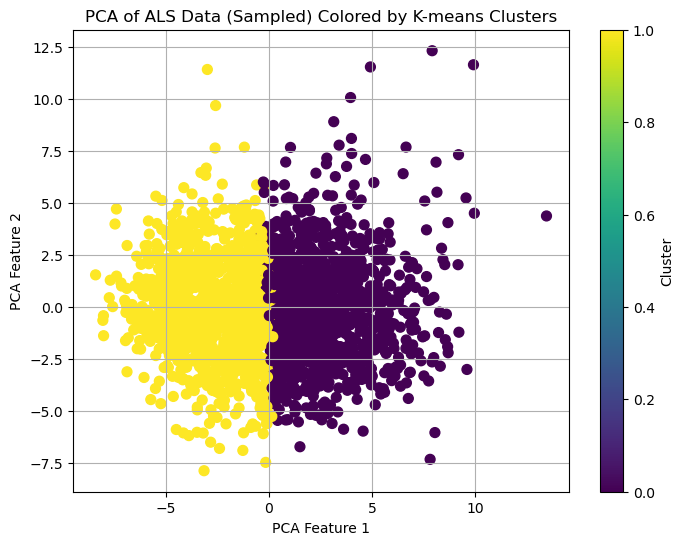

In [56]:
# k = 2 is the optimal number of clusters

optimal_n = 2

# K-means with the optimal number of clusters

kmeans_optimal = KMeans(n_clusters=optimal_n, random_state=42, n_init=10)
cluster_labels_optimal = kmeans_optimal.fit_predict(als_scaled_data)

# PCA transformation with two features

pca = PCA(n_components=2)
pca_data = pca.fit_transform(als_scaled_data)

# scatter plot of the PCA-transformed data

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels_optimal, cmap='viridis', s=50)
plt.title('PCA of ALS Data (Sampled) Colored by K-means Clusters')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

### Conclusion:

Using the ALS patient dataset, I applied K-means clustering and Principal Component Analysis (PCA) to determined the optimal number of clusters which is 2. The PCA analysis allowed me to visualize the two clusters. Moreover, the clustering approach provides an initial, unsupervised means of segmenting patients based on the available features. However, further investigation is necessary to understand the underlying characteristics and clinical relevance of these clusters. By exploring which features contribute most to the differentiation and examining how these clusters correlate with patient outcomes or treatment responses. Overall, clustering and dimensionality reduction proved to be effective techniques for uncovering potential structures within this complex dataset.  However, further analysis is needed to understand the clinical or biological implications of these groupings fully.
